In [1]:
import re
import emoji
from nltk.tokenize import word_tokenize
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Add these lines at the beginning of your code
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

abbreviations = {
    'u': 'you',
    'r': 'are',
    'lol': 'laugh out loud',
    'omg': 'oh my god',
    'np': 'no problem',
    'wtf': 'what the fuck',
    'lmao': 'laughing my ass off',
    'lmfao': 'laughing my fucking ass off',
    'idk': 'I don\'t know',
    'btw': 'by the way',
    'jk': 'just kidding',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'nvm': 'never mind',
    'thx': 'thanks',
    'tks': 'thanks',
    'plz': 'please',
    'w/': 'with',
    'w/o': 'without',
    'b/c': 'because',
    'wbu': 'what about you',
    'w/e': 'whatever',
    'gr8': 'great',
    'tho': 'though',
    'ppl': 'people',
    'fml': 'fuck my life',
    'nbd': 'no big deal',
    'bff': 'best friends forever',
    'ikr': 'I know, right?',
    'smh': 'shaking my head',
    'irl': 'in real life',
    'ik': 'I know',
    'sry': 'sorry',
    'thn': 'then',
    'k': 'okay',
    'wbu': 'what about you',
    'ic': 'I see',
    'afaik': 'as far as I know',
    'brb': 'be right back',
    'g2g': 'got to go',
    'ttyl': 'talk to you later',
    'hmu': 'hit me up',
    'fomo': 'fear of missing out',
    'imy': 'I miss you',
    'tb': 'text back',
    'g1': 'good one',
    'w8': 'wait',
    'meh': 'whatever',
    'rly': 'really',
    'cya': 'see ya',
    'gtg': 'got to go',
    'ttys': 'talk to you soon',
    'l8r': 'later',
    'nm': 'nothing much',
    'cu': 'see you',
    'ttyl': 'talk to you later',
    'b4': 'before',
    'afk': 'away from keyboard',
    'tmi': 'too much information',
    'ty': 'thank you',
    'njoy': 'enjoy',
    'tho': 'though',
    'f2f': 'face to face',
    'idc': 'I don\'t care',
    'fyi': 'for your information',
    'wth': 'what the hell',
    'yolo': 'you only live once',
    'gratz': 'congratulations',
    'gr8': 'great',
    'ily': 'I love you',
    'thks': 'thanks',
    'luv': 'love',
}

def preprocess_tweet(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Removing URLs
    text = re.sub(r'http\S+', '', text)

    # 3. Removing mentions
    text = re.sub(r'@\w+', '', text)

    # # 4. Removing hashtags
    # text = re.sub(r'#\w+', '', text)
    
    # 4. Tokenization
    tokens = word_tokenize(text)

    # 5. Removing emojis
    tokens = [token for token in tokens if not any(c in emoji.EMOJI_DATA for c in token)]

    # 6. Removing special characters and punctuation
    tokens = [re.sub(r'\W+|\d+', '', token) for token in tokens]

    # 7. Expanding contractions and abbreviations using contractions package
    tokens = [contractions.fix(token) for token in tokens]

    # 8. Replace abbreviations
    tokens = [abbreviations.get(token, token) for token in tokens]

    # 9. Removing stop words
    tokens = [token for token in tokens if token not in stop_words]

    # 10. Lemmatization or stemming
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove empty strings
    tokens = [token for token in tokens if token != '']

    return tokens


# Example usage:
tweet = "Here's an example, tweet with @mentions, http://urls.com, #hashtags and 😃 emojis!"
preprocessed_tweet = preprocess_tweet(tweet)
print(preprocessed_tweet)


['example', 'tweet', 'hashtags', 'emojis']


In [ ]:
import pandas as pd

# tweets = pd.read_csv('/Users/antanas/GitRepo/SentPred/Data/TweetsCOV19.csv', index_col=0, dtype={'TweetId': str, 'Username': str,
#                                                                                                  'Timestamp': str, 'NoFollowers': int,
#                                                                                                  'NoFriends': int, 'NoRetweets': int,
#                                                                                                  'NoFavorites': int, 'Entities': str,
#                                                                                                  'Sentiment': str, 'Mentions': str,
#                                                                                                  'Hashtags': str, 'URLs': str,
#                                                                                                  'TweetText': str, 'UserLocation': str})
tweets = pd.read_csv('/Users/antanas/GitRepo/SentPred/Data/TweetsCOV19.csv', index_col=1)[['TweetText', 'Sentiment']]
tweets.dropna(inplace=True)

In [2]:
def split_sentiment(data):
    # Split the 'Sentiment' column into two separate columns
    data[['Positive_Sentiment', 'Negative_Sentiment']] = data['Sentiment'].str.split(' ', expand=True)

    # Convert the sentiment columns to integers
    data['Positive_Sentiment'] = data['Positive_Sentiment'].astype(int)
    data['Negative_Sentiment'] = data['Negative_Sentiment'].astype(int)

    # Calculate the average sentiment and create a new column
    data['Average_Sentiment'] = (data['Positive_Sentiment'] + data['Negative_Sentiment']) / 2

    # Create a new column 'Sentiment_Class' based on the 'Average_Sentiment' column
    data['Sentiment_Class'] = data['Average_Sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

    # Drop the original 'Sentiment' column
    data.drop(columns=['Sentiment'], inplace=True)

    return data

In [3]:
import os
import pandas as pd

def load_or_process_data(input_folder, filename):
    if input_folder is None:
        input_folder = 'Data'
        
    if not os.path.exists(input_folder):
        os.makedirs(input_folder)
        
    processed_filename = 'processed_' + os.path.splitext(filename)[0] + '.feather'
    input_file_path = os.path.join(input_folder, filename)
    output_file_path = os.path.join(input_folder, processed_filename)
    
    # Check if the processed file exists in the input folder
    if os.path.exists(output_file_path):
        # If it does, load and return the processed data
        data = pd.read_feather(output_file_path)
    else:
        # If it doesn't, load the raw data from the input folder
        data = pd.read_csv(input_file_path, index_col=1)[['TweetText', 'Sentiment']]
        data.dropna(inplace=True)
        
        # Preprocess the tweets
        data['TweetText'] = data['TweetText'].apply(preprocess_tweet)
        
        # Process the data
        data = split_sentiment(data)
        
        # Save the processed data in the input folder
        data.reset_index().drop(columns=['TweetId']).to_feather(output_file_path)
    
    return data

# Example usage:
input_folder = '/Users/antanas/GitRepo/SentPred/Data'
filename = 'TweetsCOV19.csv'

t_tweets = load_or_process_data(input_folder, filename)

In [4]:
t_tweets.head()

,TweetText,Positive_Sentiment,Negative_Sentiment,Average_Sentiment,Sentiment_Class
0,"[blog, californian, support, vaccine, law, new...",2,-1,0.5,1
1,"[secretary, state, recall, stormont, next, mon...",2,-1,0.5,1
2,"[serving, afghanistan, marine, corporal, brand...",2,-3,-0.5,-1
3,"[witch, vixen, season, start, tomorrow, receiv...",1,-1,0.0,0
4,"[cgtn, scene, around, troop, equipment, unit, ...",1,-1,0.0,0


<Figure size 57600x28800 with 0 Axes>

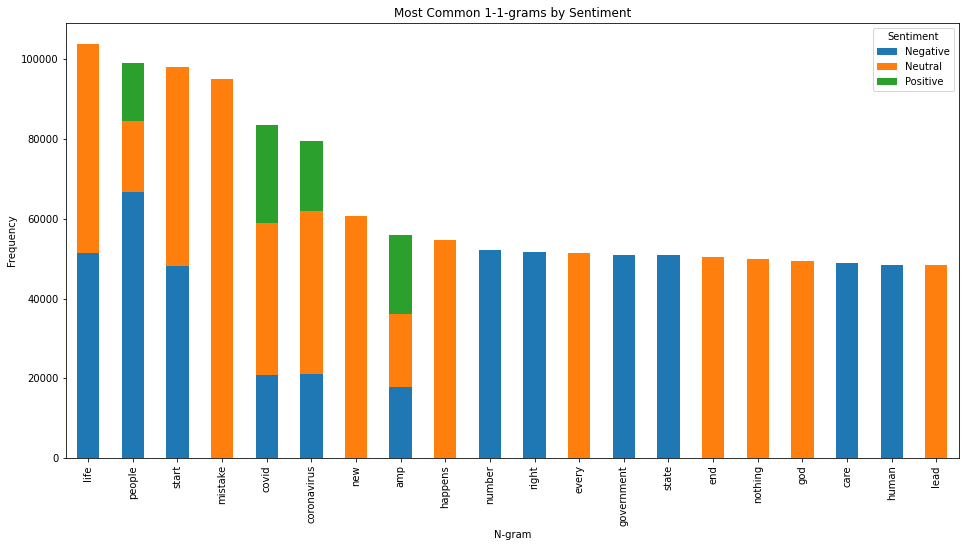

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def get_ngrams(tokens, n):
    return list(zip(*[tokens[i:] for i in range(n)]))

def count_ngrams(tweets, n):
    ngram_counts = Counter()
    for tweet in tweets:
        tokens = tweet  # Update here
        ngrams = get_ngrams(tokens, n)
        ngram_counts.update(ngrams)
    return ngram_counts

def plot_most_common_ngrams_by_sentiment(tweets_df, ngram_range=(1, 1), num_ngrams=10, output_path=None):
    sentiment_classes = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

    # Count n-grams by sentiment class
    ngram_counts_by_sentiment = {}
    for sentiment_class, sentiment_label in sentiment_classes.items():
        ngram_counts = Counter()
        sentiment_tweets = tweets_df[tweets_df['Sentiment_Class'] == sentiment_class]['TweetText']

        for n in range(ngram_range[0], ngram_range[1] + 1):
            ngram_counts.update(count_ngrams(sentiment_tweets, n))
        
        ngram_counts_by_sentiment[sentiment_label] = ngram_counts.most_common(num_ngrams)

    # Create DataFrame for plotting
    ngram_count_data = []
    for sentiment_label, ngram_counts in ngram_counts_by_sentiment.items():
        for ngram, count in ngram_counts:
            ngram_count_data.append({'N-gram': ' '.join(ngram), 'Count': count, 'Sentiment': sentiment_label})
    
    ngram_count_df = pd.DataFrame(ngram_count_data)

    # Pivot DataFrame
    ngram_count_pivot = ngram_count_df.pivot_table(values='Count', index='N-gram', columns='Sentiment', fill_value=0)

    # Calculate total frequency and sort by it in descending order
    ngram_count_pivot['Total_Frequency'] = ngram_count_pivot.sum(axis=1)
    ngram_count_pivot.sort_values(by='Total_Frequency', ascending=False, inplace=True)
    ngram_count_pivot.drop(columns=['Total_Frequency'], inplace=True)

    # Plot stacked bar chart
    plt.figure(figsize=(800, 400))
    ngram_count_pivot.head(num_ngrams).plot(kind='bar', stacked=True, figsize=(16, 8))
    plt.title(f'Most Common {ngram_range[0]}-{ngram_range[1]}-grams by Sentiment')
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

    if output_path:
        plt.savefig(output_path)

    plt.show()

plot_most_common_ngrams_by_sentiment(t_tweets, ngram_range=(1, 1), num_ngrams=20)

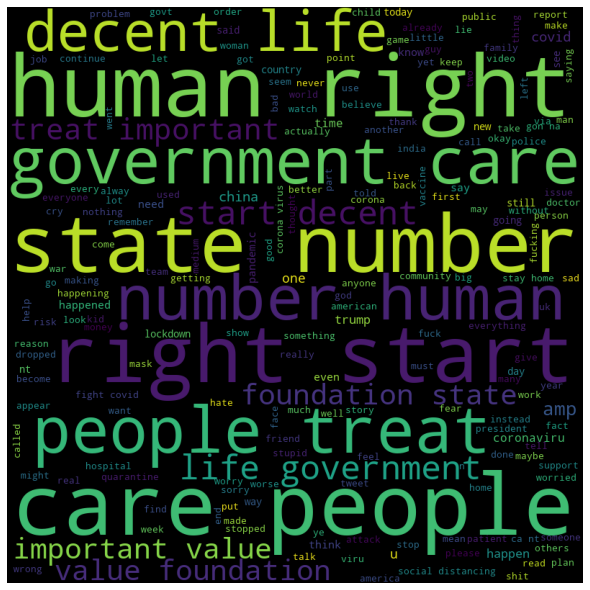

In [6]:
import numpy as np
from wordcloud import WordCloud
from PIL import Image

def plot_word_cloud(tweets_df, sentiment_label, output_path=None):
    # Filter tweets by sentiment_label
    sentiment_tweets = tweets_df[tweets_df['Sentiment_Class'] == sentiment_label]['TweetText']
    
    # Concatenate tweet texts
    text = ' '.join([' '.join(tweet) for tweet in sentiment_tweets])

    # Create word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)

    # Plot word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

    if output_path:
        plt.savefig(output_path)

    plt.show()

# Example usage:
plot_word_cloud(t_tweets, sentiment_label=-1)  # 1 for positive, 0 for neutral, -1 for negative

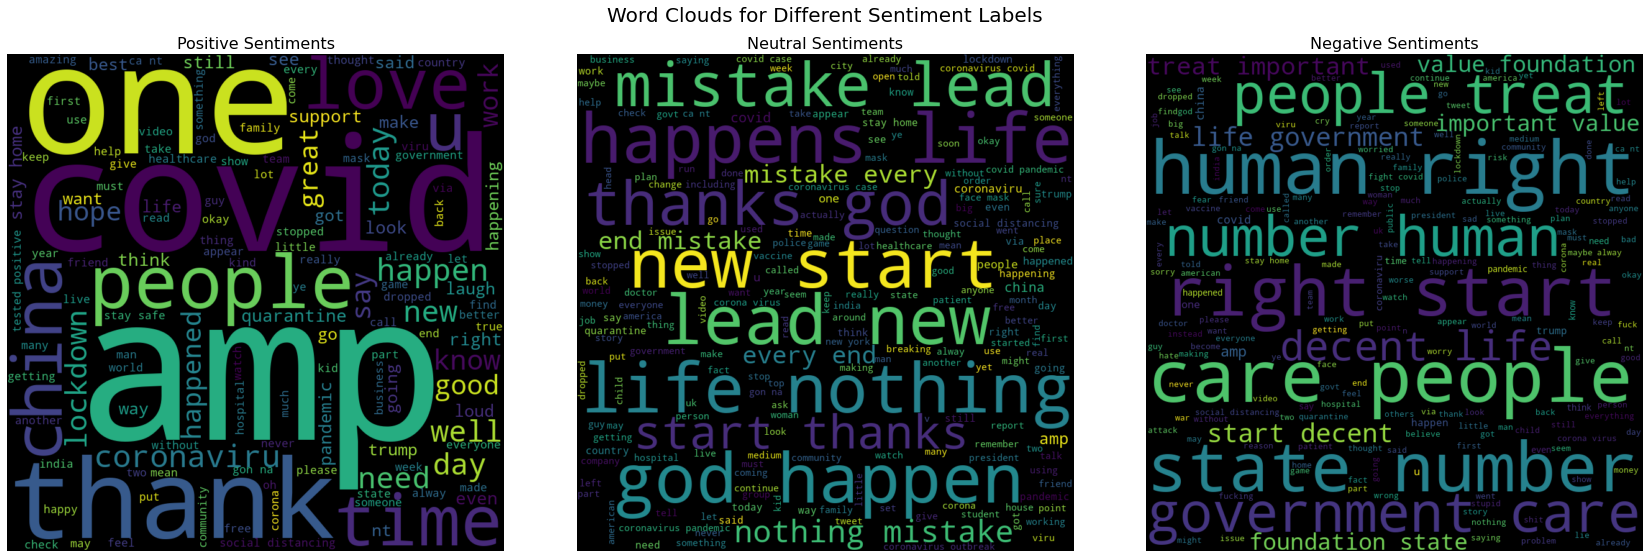

In [7]:
import matplotlib.pyplot as plt

def plot_all_sentiment_word_clouds(tweets_df):
    sentiment_labels = [1, 0, -1]
    sentiment_titles = ['Positive Sentiments', 'Neutral Sentiments', 'Negative Sentiments']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    fig.suptitle('Word Clouds for Different Sentiment Labels', fontsize=20)

    for i, sentiment_label in enumerate(sentiment_labels):
        sentiment_tweets = tweets_df[tweets_df['Sentiment_Class'] == sentiment_label]['TweetText']
        text = ' '.join([' '.join(tweet) for tweet in sentiment_tweets])

        wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(sentiment_titles[i], fontsize=16)
        axes[i].axis('off')

    plt.tight_layout(pad=2)
    plt.show()

# Example usage:
plot_all_sentiment_word_clouds(t_tweets)


In [ ]:
import seaborn as sns

def plot_sentiment_counts(tweets_df, output_path=None):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment_Class', data=tweets_df, palette='coolwarm')
    plt.title('Number of Positive, Negative, and Neutral Sentiments', fontsize=16)
    plt.xlabel('Sentiment Class')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])

    if output_path:
        plt.savefig(output_path)

    plt.show()

# Example usage:
plot_sentiment_counts(tweets)


In [4]:
## prepare splitting function for pd dataset

from sklearn.model_selection import train_test_split

def split_dataframe(df, train_size=0.75, val_size=0.05, test_size=0.2, random_state=None):

    # Split the DataFrame into training and test sets
    train_df, test_df = train_test_split(df, train_size=train_size+val_size, test_size=test_size, random_state=random_state)

    # Split the training set into training and validation sets
    train_df, val_df = train_test_split(train_df, train_size=train_size/(train_size+val_size), test_size=val_size/(train_size+val_size), random_state=random_state)

    return train_df, val_df, test_df

train, val, test = split_dataframe(t_tweets, random_state=42)

## VADER 

In [ ]:
import pandas as pd
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def evaluate_sentiment(tokens):
    sia = SentimentIntensityAnalyzer()
    text = ' '.join(tokens)
    sentiment = sia.polarity_scores(text)
    
    return sentiment

def process_and_save_vader_sentiments(tweets, chunk_size, output_folder, output_filename):
    num_chunks = len(tweets) // chunk_size
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    output_file_path = os.path.join(output_folder, output_filename)

    for i in range(num_chunks + 1):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        
        chunk = tweets.iloc[start_idx:end_idx]
        VADER_sentiments = chunk['TweetText'].apply(evaluate_sentiment)
        
        if os.path.exists(output_file_path) and i > 0:
            mode = 'a'
        else:
            mode = 'w'
        
        VADER_sentiments.reset_index().to_feather(output_file_path, mode=mode)
        print(f"Processed and saved chunk {i + 1} of {num_chunks + 1}")

# Example usage
chunk_size = 1000
output_folder = 'Data/VADER_sentiments'
output_filename = 'VADER_sentiments.feather'

process_and_save_vader_sentiments(tweets, chunk_size, output_folder, output_filename)


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def evaluate_sentiment(tokens):
    sia = SentimentIntensityAnalyzer()
    text = ' '.join(tokens)
    sentiment = sia.polarity_scores(text)
    
    return sentiment

VADER_sentiments = tweets['TweetText'].apply(evaluate_sentiment)

### TF-IDF

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
# tweets_df = pd.read_csv('your_data.csv')

# If you have already preprocessed the tweets and stored them in 't_tweets' DataFrame, you can use the following line:
tweets = t_tweets['TweetText']

# Join tokens into a single string for each tweet
tweets_text = [' '.join(tweet) for tweet in tweets]

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer to the tweets and transform the tweets into TF-IDF embeddings
tfidf_embeddings = vectorizer.fit_transform(tweets_text)

# Now, `tfidf_embeddings` is a sparse matrix containing the TF-IDF embeddings of the TweetsCOV19 dataset


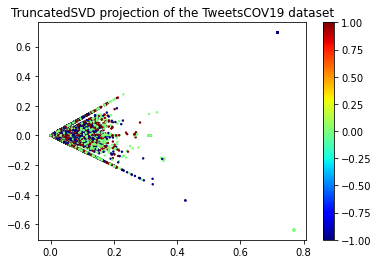

In [9]:
from umap import umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_embeddings = svd.fit_transform(tfidf_embeddings)

# Assuming 'sentiment_labels' contains the sentiment labels for each tweet in the dataset
sentiment_labels = t_tweets['Sentiment_Class']

# Create a scatter plot of the reduced embeddings with colors based on sentiment labels
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=2, c=sentiment_labels, cmap='jet')
plt.title("TruncatedSVD projection of the TweetsCOV19 dataset")
plt.colorbar()
plt.show()


In [10]:
unique_tokens = set()

for tweet in t_tweets['TweetText']:
    for token in tweet:
        unique_tokens.add(token)

vocabulary_size = len(unique_tokens)
print(f"Vocabulary size: {vocabulary_size}")


Vocabulary size: 295361


### Bag of Words

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Load your dataset
# tweets_df = pd.read_csv('your_data.csv')

# If you have already preprocessed the tweets and stored them in 't_tweets' DataFrame, you can use the following line:
tweets = t_tweets['TweetText']

# Join tokens into a single string for each tweet
tweets_text = [' '.join(tweet) for tweet in tweets]

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer to the tweets and transform the tweets into Bag of Words embeddings
bow_embeddings = vectorizer.fit_transform(tweets_text)

# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=2)
reduced_embeddings = svd.fit_transform(bow_embeddings)


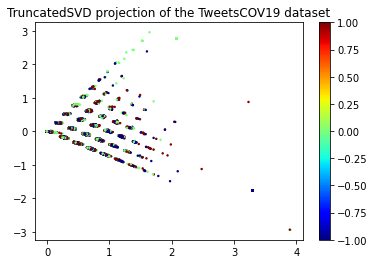

In [11]:
# Assuming 'sentiment_labels' contains the sentiment labels for each tweet in the dataset
sentiment_labels = t_tweets['Sentiment_Class']
# Create a scatter plot of the reduced embeddings with colors based on sentiment labels
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=2, c=sentiment_labels, cmap='jet')
plt.title("TruncatedSVD projection of the TweetsCOV19 dataset")
plt.colorbar()
plt.show()

### Word2Vec

In [ ]:
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec embeddings
model = api.load("word2vec-google-news-300")

# Create an embedding matrix for the dataset
def create_embedding_matrix(word_index, embeddings, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        if word in embeddings:
            embedding_vector = embeddings[word]
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Create a word index for the TweetsCOV19 dataset
word_index = {}
for tweet in t_tweets['TweetText']:
    tokens = tweet
    for token in tokens:
        if token not in word_index:
            word_index[token] = len(word_index) + 1

# Create the embedding matrix
embedding_dim = 300
embedding_matrix = create_embedding_matrix(word_index, model, embedding_dim)

# Generate embeddings for each tweet
tweet_embeddings = []
for tweet in t_tweets['TweetText']:
    tokens = tweet
    token_indices = [word_index[token] for token in tokens if token in word_index]
    tweet_embedding = np.mean([embedding_matrix[idx] for idx in token_indices], axis=0)
    tweet_embeddings.append(tweet_embedding)

# Now, `tweet_embeddings` contains the Word2Vec embeddings for each tweet in the dataset


### Glove

In [ ]:
import numpy as np
import torch
import torch.nn as nn

# Load pre-trained GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Create an embedding matrix for the dataset
def create_embedding_matrix(word_index, embeddings, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Download the GloVe embeddings if you haven't already
# You can download them from https://nlp.stanford.edu/projects/glove/
# For this example, we will use the 100-dimensional GloVe embeddings
glove_file = '/Users/antanas/GitRepo/SentPred/models/glove/glove.6B.50d.txt'

# Load the pre-trained GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file)

# Create a word index for the TweetsCOV19 dataset
word_index = {}
for tweet in t_tweets['TweetText']:
    for token in tweet:
        if token not in word_index:
            word_index[token] = len(word_index) + 1

# Create the embedding matrix
embedding_dim = 50
embedding_matrix = create_embedding_matrix(word_index, glove_embeddings, embedding_dim)

# Create an embedding layer using the embedding matrix
embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32))

# Use the embedding layer to generate embeddings for each tweet
tweet_embeddings = []
for tweet in t_tweets['TweetText']:
    token_indices = [word_index[token] for token in tweet if token in word_index]
    token_indices_tensor = torch.tensor(token_indices, dtype=torch.long)
    tweet_embedding = embedding_layer(token_indices_tensor)
    tweet_embeddings.append(tweet_embedding)

# Now, `tweet_embeddings` contains the GloVe embeddings for each tweet in the dataset
tweet_embeddings[0]

### FastText

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from gensim.models import KeyedVectors

# Load pre-trained FastText embeddings
def load_fasttext_embeddings(fasttext_file):
    return KeyedVectors.load_word2vec_format(fasttext_file)

# Create an embedding matrix for the dataset
def create_embedding_matrix(word_index, embeddings, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        if word in embeddings:
            embedding_vector = embeddings[word]
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Download the FastText embeddings if you haven't already
fasttext_file = '/Users/antanas/GitRepo/SentPred/models/FastText/wiki-news-300d-1M.vec'

# Load the pre-trained FastText embeddings
fasttext_embeddings = load_fasttext_embeddings(fasttext_file)

# Create a word index for the TweetsCOV19 dataset
word_index = {}
for tweet in t_tweets['TweetText']:
    for token in tweet:
        if token not in word_index:
            word_index[token] = len(word_index) + 1

# Create the embedding matrix
embedding_dim = 300
embedding_matrix = create_embedding_matrix(word_index, fasttext_embeddings, embedding_dim)

# Create an embedding layer using the embedding matrix
embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32))

# Use the embedding layer to generate embeddings for each tweet
tweet_embeddings = []
for tweet in t_tweets['TweetText']:
    token_indices = [word_index[token] for token in tweet if token in word_index]
    token_indices_tensor = torch.tensor(token_indices, dtype=torch.long)
    tweet_embedding = embedding_layer(token_indices_tensor)
    
    # Average the embeddings of all words in the tweet
    avg_embedding = torch.mean(tweet_embedding, dim=0)
    tweet_embeddings.append(avg_embedding)

# Now, `tweet_embeddings` contains the average FastText embeddings for each tweet in the dataset


In [ ]:
len(tweet_embeddings[0])